# NLP (Natural Language Processing) with Python


This is a higher level overview of the basics of Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand!

    

## Get the Data

In [1]:
import nltk
#nltk.download_shell()
# we will download stop words, in case if it's not there 
# write d then stopwords and write q to quit
#Importing important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



We'll be using a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)!
This file contains a collection of more than 5 thousand SMS phone messages. You can check out the **readme** file for more info.

Let's go ahead and use rstrip() plus a list comprehension to get a list of all the lines of text messages:

In [2]:
# We are using list comprehnesion to call the file. rstrip() returns the same line 
# rstrip(od) will return go from good, removes trainling character
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
print(len(messages))
#Number of messages in the file

5574


In [4]:
# Let's check some random message
messages[1:10]
# Its not that clear, so we will enumerate the messages to make it look good

['ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'spam\tHad your mobile 11 months or more? U R entitled to Update to the latest 

In [5]:
# Let's Ennumerate 10 messges to see the data how it is!
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

Due to the spacing we can tell that this is a [TSV](http://en.wikipedia.org/wiki/Tab-separated_values) ("tab separated values") file, where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself. (Note our numbers aren't part of the file, they are just from the **enumerate** call).

Using these labeled ham and spam examples, we'll **train a machine learning model to learn to discriminate between ham/spam automatically**. Then, with a trained model, we'll be able to **classify arbitrary unlabeled messages** as ham or spam.

In [6]:
# as we have seen the data now lets convert it into table formate, by separating it with \t
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [8]:
# Lets check some stats
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby('label').describe()

#We can see less spams and some of them are repeatitive also
# We need to do some feature engineering here

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
# messge lengths also matters in most of cases to identify the spam messages Let's add it
messages['length']=messages['message'].apply(len)

In [11]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization

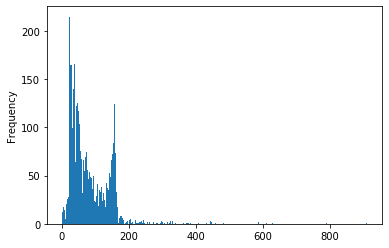

In [12]:
# Let's visualize the length of messages to see the distribution
messages['length'].plot.hist(bins=500)
# most of the messages in range 20 to 100

In [13]:
messages['length'].describe()
# mean messages lenhth is 80 words

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
# We see one quite a long message let's check what it is
messages[messages['length']==910]['message'].iloc[0]
# Seems some kind of love letter

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D007CEC50>,
      dtype=object)

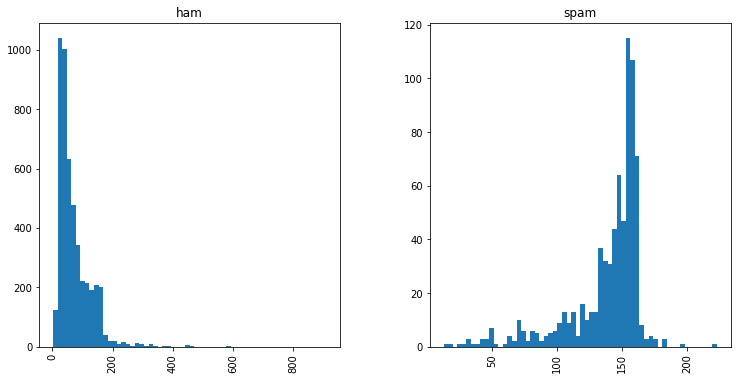

In [15]:
# Lets visualize the data by category
messages.hist(column='length',by='label',bins=60,figsize=(12,6))

Very interesting! Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters. 

Now let's begin to process the data so we can eventually use it with SciKit Learn!

## Text Pre-processing
Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.


In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the message column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [16]:
# This library will help us in dealing with string operations; Below we will see one example also
import string

### Tokenization
Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

Let's see an example output on on column:

In [17]:
mess= 'sample message ! notice: it has punctuation.'

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
nonpunct=[c for c in mess if c not in string.punctuation]

In [20]:
nonpunct

['s',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 ' ',
 'n',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [21]:
nonpunct= ''.join(nonpunct)
nonpunct

'sample message  notice it has punctuation'

In [22]:
# stopwords are common words which can be neglected while doing analysis
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
nonpunct.split()

['sample', 'message', 'notice', 'it', 'has', 'punctuation']

In [24]:
# We will now clean the message in order to have a important words only
clean_mess=[word for word in nonpunct.split() if word.lower() not in stopwords.words('english')]

In [25]:
clean_mess

['sample', 'message', 'notice', 'punctuation']

In [26]:
#Let's Create funtion to perform it for all the messages 
def test_process(mess):
    """
    remove punct
    remove stop words
    clean list of text words    
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [27]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# Tokenization
messages['message'].head().apply(test_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Normalization
### Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this check this [NLTK book online](http://www.nltk.org/book/).

We will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

## Vectorization

Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [29]:
# vectorization
# convert each word into vector
# we are going to see all the words in a dataset
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
## Might take awhile...
bow_transformer = CountVectorizer(analyzer=test_process).fit(messages['message'])

In [31]:
#Let's check Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [32]:
# Let's check how BOW model convert the vectors on one specific text message
mess4= messages['message'][3]

In [33]:
len(mess4)

49

In [34]:
# Let's transrom to BOW
bow4 = bow_transformer.transform([mess4])

In [35]:
print(bow4)


  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once. Let's check and confirm which ones appear twice:

In [36]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


In [37]:
# Let's check size of the vector which shall be one * number of vectors
print(bow4.shape)

(1, 11425)


In [38]:
# Tranforming all the messages into Bag of words
messages_bow=bow_transformer.transform(messages['message'])

In [39]:
print('shape of the sparse matrix: ',messages_bow.shape)

shape of the sparse matrix:  (5572, 11425)


In [40]:
# Lets check how many are non-zero values in sparxe Matrix
messages_bow.nnz

50548

# Let's check sparsity of the matrix:
Sparsity: In numerical analysis and scientific computing, a sparse matrix or sparse array is a matrix in which most of the elements are zero. By contrast, if most of the elements are nonzero, then the matrix is considered dense. The number of zero-valued elements divided by the total number of elements (e.g., m × n for an m × n matrix) is called the sparsity of the matrix (which is equal to 1 minus the density of the matrix). Using those definitions, a matrix will be sparse when its sparsity is greater than 0.5.

In [41]:

sparsity=messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1])*100
print('sparsity: ',sparsity)

sparsity:  0.07940295412668218


After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____
### So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

**Let's try first on one message/document and then we will use it on rest. 
weighing and normalization with TFITF**

In [42]:
# calling library
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
# transformer instance
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [44]:
#Lets check tfidf for one message/document
tfidf4=tfidf_transformer.transform(bow4)
print(tfidf4)
# the words have a good number of frequency 

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [45]:
# Let's check for some message 3 also
mess3 = messages['message'][2]
print(mess3)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [46]:
bow3= bow_transformer.transform([mess3])
print(bow3)

  (0, 73)	1
  (0, 423)	1
  (0, 430)	1
  (0, 443)	1
  (0, 871)	1
  (0, 1551)	1
  (0, 1833)	2
  (0, 1941)	1
  (0, 2804)	1
  (0, 3953)	1
  (0, 4731)	1
  (0, 5619)	1
  (0, 6331)	2
  (0, 6557)	1
  (0, 9159)	1
  (0, 9200)	1
  (0, 9252)	1
  (0, 10512)	1
  (0, 10686)	1
  (0, 11084)	1
  (0, 11123)	1


In [47]:
tfidf3=tfidf_transformer.transform(bow3)
print(tfidf3)

  (0, 11123)	0.19104387220509106
  (0, 11084)	0.15898145347176754
  (0, 10686)	0.13995540820792943
  (0, 10512)	0.2118842499614227
  (0, 9252)	0.16121646071144807
  (0, 9200)	0.22538631044314436
  (0, 9159)	0.22538631044314436
  (0, 6557)	0.18466951562322612
  (0, 6331)	0.347904654589528
  (0, 5619)	0.1887440015250524
  (0, 4731)	0.16452475271486866
  (0, 3953)	0.1544015632869991
  (0, 2804)	0.17524194104333074
  (0, 1941)	0.1526581729225716
  (0, 1833)	0.4507726208862887
  (0, 1551)	0.2177823443125605
  (0, 871)	0.2118842499614227
  (0, 443)	0.2177823443125605
  (0, 430)	0.2177823443125605
  (0, 423)	0.09639170919810956
  (0, 73)	0.22538631044314436


In [48]:
# Let's check what are these words max and min tfidf value
print(bow_transformer.get_feature_names()[1833])


FA


In [49]:
# Let's Transform the entire Bag of words corpus
messages_tfidf=tfidf_transformer.transform(messages_bow)


In [50]:
print(messages_tfidf.shape)

(5572, 11425)


In [52]:
messages_tfidf


<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [53]:
# Converting Sparse matrix to dataframe so that we can split it into test and train set
import scipy.sparse
X_df = pd.DataFrame(messages_tfidf.todense())

In [54]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11415,11416,11417,11418,11419,11420,11421,11422,11423,11424
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Training a model
With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the Naive Bayes classifier algorithm is a good choice.
We'll be using scikit-learn here, choosing the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier to start with:

## Train Test Split
The test size is 20% of the entire dataset (1115 messages out of total 5572), and the training is the rest (4457 out of 5572).

In [55]:
from sklearn.model_selection import train_test_split

msg_Train, msg_Test, label_Train, label_Test = \
train_test_split(X_df, messages['label'], test_size=0.2)

print(len(msg_Train), len(msg_Test), len(msg_Train) + len(msg_Test))

4457 1115 5572


In [57]:
#naive base classifier
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB_Class= NB.fit(msg_Train,label_Train)
label_pred = NB_Class.predict(msg_Test)

In [58]:
label_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')


## Part 6: Model Evaluation
Now we want to determine how well our model will do overall on the entire dataset. Let's begin by getting all the predictions:
We can use SciKit Learn's built-in classification report, which returns [precision, recall,](https://en.wikipedia.org/wiki/Precision_and_recall) [f1-score](https://en.wikipedia.org/wiki/F1_score), and a column for support (meaning how many cases supported that classification). Check out the links for more detailed info on each of these metrics and the figure below:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

In [60]:
# Let's check classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(label_Test, label_pred))
print (confusion_matrix(label_Test, label_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       964
        spam       1.00      0.79      0.88       151

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

[[964   0]
 [ 32 119]]


**Instead of Doing all these steps separately they can be clubbed together in a pipeline**


## Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [61]:
# We will take the raw messages data and 60 - 40 train test split
Msg_train, Msg_test, Label_train, Label_test = train_test_split( messages['message'],messages['label'], test_size=0.4)

In [62]:
# pipeline
from sklearn.pipeline import Pipeline

**Let's Put all stpes together one by one**
1. Creating Bag of words, that is to create sparse matrix from messages. Tokenization/Nonpunct/Stopwords/Lemmatization/Count_Vectorization.
2. Term frequency and Inverse Document Frequency
3. Use the model

In [63]:
#Initializing Pipeline as pipeline

pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=test_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [65]:
# using pipeline to fit to the model
pipeline.fit(Msg_train,Label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function test_process at 0x0000023D00D7BB70>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [66]:
predictions= pipeline.predict(Msg_test)

In [68]:
print(classification_report(Label_test,predictions))
print(confusion_matrix(Label_test,predictions))
# Looks good enough

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1920
        spam       1.00      0.64      0.78       309

    accuracy                           0.95      2229
   macro avg       0.97      0.82      0.88      2229
weighted avg       0.95      0.95      0.95      2229

[[1920    0]
 [ 111  198]]


#### Let's Try same with Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc=RandomForestClassifier()

In [71]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=test_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [73]:
pipeline.fit(Msg_train,Label_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function test_process at 0x0000023D00D7BB70>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                              

In [74]:
rfcpredict=pipeline.predict(Msg_test)

In [76]:
print(classification_report(Label_test,rfcpredict))
print(confusion_matrix(Label_test,rfcpredict))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1920
        spam       0.99      0.73      0.84       309

    accuracy                           0.96      2229
   macro avg       0.97      0.87      0.91      2229
weighted avg       0.96      0.96      0.96      2229

[[1918    2]
 [  83  226]]
